In [15]:
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

### Data Processing

In [3]:
PATH = "./data"
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'val')
test_dir = os.path.join(PATH, 'test')

BATCH_SIZE = 32
IMG_SIZE = (224,224)
IMG_SHAPE = IMG_SIZE + (3,)

In [4]:
train_datagenerator = ImageDataGenerator(rescale = 1.0/255,
                                        shear_range = 0.2,
                                        zoom_range = 0.5,
                                        horizontal_flip = True,
                                        rotation_range=10,
                                        width_shift_range=0.2,
                                        brightness_range=[0.2,1.2]
                                        )

validation_datagen = ImageDataGenerator(rescale = 1.0/255)

test_datagenerator = ImageDataGenerator(rescale = 1.0/255)

In [16]:
train_data = train_datagenerator.flow_from_directory(train_dir,
                                                    target_size = IMG_SIZE,batch_size = BATCH_SIZE,
                                                    class_mode = 'categorical',
                                                    seed=42,shuffle=True)

validation_data = validation_datagen.flow_from_directory(validation_dir,
                                                    target_size = IMG_SIZE,batch_size = BATCH_SIZE,
                                                    class_mode = 'categorical',
                                                    seed=42,shuffle=True)

test_data = test_datagenerator.flow_from_directory(test_dir,
                                                    target_size = IMG_SIZE,batch_size = BATCH_SIZE,
                                                    class_mode = 'categorical',
                                                    seed=42,shuffle=True)

Found 1951 images belonging to 4 classes.
Found 253 images belonging to 4 classes.
Found 106 images belonging to 4 classes.


In [6]:
print(train_data.total_batches_seen)
print(train_data.class_indices)
print(train_data.batch_size)

0
{'diseased cotton leaf': 0, 'diseased cotton plant': 1, 'fresh cotton leaf': 2, 'fresh cotton plant': 3}
32


In [7]:
classes_name = list(train_data.class_indices.keys())
classes_name

['diseased cotton leaf',
 'diseased cotton plant',
 'fresh cotton leaf',
 'fresh cotton plant']

In [8]:
def plotImages(images,lables):
  fig,axes = plt.subplots(8,4,figsize=(20,20))
  axes = axes.flatten()
  i = 0;
  for img,ax in zip(images, axes):
    ax.imshow(img)
    ax.axis('off')
    ax.title.set_text(classes_name[np.argmax(labels[i])])
    i = i + 1;

In [9]:
#imgs, labels = next(train_data)
# plotImages(imgs,labels)

#ResNet50

In [ ]:
base_model_resnet50 = tf.keras.applications.resnet50.ResNet50(input_shape=IMG_SHAPE, weights='imagenet', include_top=False)
for layer in base_model_resnet50.layers:
    layer.trainable = False

In [ ]:
inputs = base_model_resnet50.input
x = tf.keras.layers.Flatten()(base_model_resnet50.output)
outputs = tf.keras.layers.Dense(4, activation='softmax')(x)

model_resnet50 = tf.keras.Model(inputs, outputs)

In [ ]:
base_learning_rate = 0.0001
model_resnet50.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model_resnet50.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
num_epochs = 20
history_resnet50 = model_resnet50.fit(train_data,epochs=num_epochs,validation_data=validation_data)

Epoch 1/20
61/61 [==============================] - 45s 652ms/step - loss: 1.4529 - accuracy: 0.3518 - val_loss: 1.4802 - val_accuracy: 0.3083
Epoch 2/20
61/61 [==============================] - 39s 635ms/step - loss: 1.3003 - accuracy: 0.4296 - val_loss: 1.2215 - val_accuracy: 0.4704
Epoch 3/20
61/61 [==============================] - 38s 626ms/step - loss: 1.2658 - accuracy: 0.4519 - val_loss: 1.2322 - val_accuracy: 0.5731
Epoch 4/20
61/61 [==============================] - 38s 624ms/step - loss: 1.2951 - accuracy: 0.4249 - val_loss: 1.1905 - val_accuracy: 0.5178
Epoch 5/20
61/61 [==============================] - 38s 623ms/step - loss: 1.2405 - accuracy: 0.4497 - val_loss: 1.0351 - val_accuracy: 0.6838
Epoch 6/20
61/61 [==============================] - 38s 622ms/step - loss: 1.2279 - accuracy: 0.4865 - val_loss: 1.1312 - val_accuracy: 0.5573
Epoch 7/20
61/61 [==============================] - 38s 625ms/step - loss: 1.1870 - accuracy: 0.4906 - val_loss: 1.0341 - val_accuracy: 0.5692

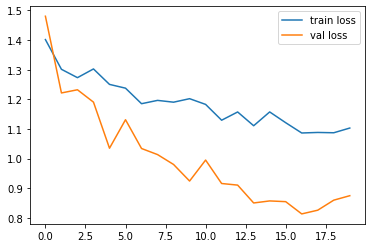

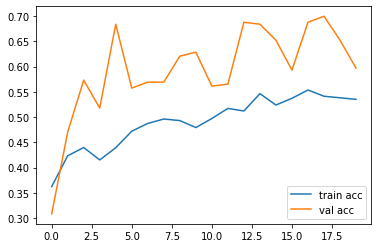

In [ ]:
plt.plot(history_resnet50.history['loss'], label='train loss')
plt.plot(history_resnet50.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('./result/Loss_RESNET50.png')
plt.show()

# plot the accuracy
plt.plot(history_resnet50.history['accuracy'], label='train acc')
plt.plot(history_resnet50.history['val_accuracy'], label='val acc')
plt.legend()
plt.savefig('./result/Accuracy_RESNET50.png')
plt.show()

In [ ]:
model_resnet50.save('./model/model_resnet50.h5')

#ResNet152V2

In [ ]:
base_model_resnet152V2 = tf.keras.applications.ResNet152V2(input_shape=IMG_SHAPE, weights='imagenet', include_top=False)
for layer in base_model_resnet152V2.layers:
    layer.trainable = False

In [ ]:
inputs = base_model_resnet152V2.input
x = tf.keras.layers.Flatten()(base_model_resnet152V2.output)
outputs = tf.keras.layers.Dense(4, activation='softmax')(x)

model_resnet152v2 = tf.keras.Model(inputs, outputs)

In [ ]:
base_learning_rate = 0.0001
model_resnet152v2.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model_resnet152v2.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
num_epochs = 20
history_resnet152v2 = model_resnet152v2.fit(train_data,epochs=num_epochs,validation_data=validation_data)

Epoch 1/20
61/61 [==============================] - 51s 714ms/step - loss: 1.0979 - accuracy: 0.6190 - val_loss: 0.4187 - val_accuracy: 0.8379
Epoch 2/20
61/61 [==============================] - 41s 673ms/step - loss: 0.3735 - accuracy: 0.8639 - val_loss: 0.2869 - val_accuracy: 0.9012
Epoch 3/20
61/61 [==============================] - 41s 676ms/step - loss: 0.2894 - accuracy: 0.9045 - val_loss: 0.2262 - val_accuracy: 0.9091
Epoch 4/20
61/61 [==============================] - 41s 672ms/step - loss: 0.2500 - accuracy: 0.8975 - val_loss: 0.2018 - val_accuracy: 0.9289
Epoch 5/20
61/61 [==============================] - 41s 673ms/step - loss: 0.2122 - accuracy: 0.9232 - val_loss: 0.1775 - val_accuracy: 0.9249
Epoch 6/20
61/61 [==============================] - 41s 675ms/step - loss: 0.1949 - accuracy: 0.9373 - val_loss: 0.1489 - val_accuracy: 0.9407
Epoch 7/20
61/61 [==============================] - 41s 674ms/step - loss: 0.1813 - accuracy: 0.9329 - val_loss: 0.1454 - val_accuracy: 0.9526

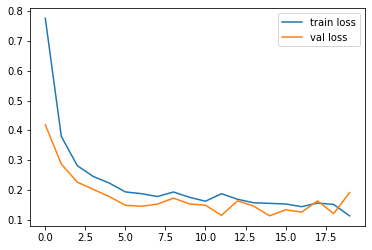

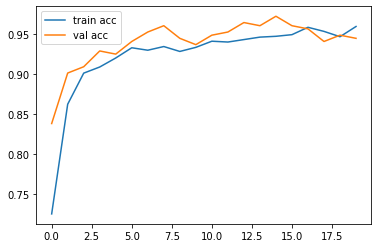

In [ ]:
plt.plot(history_resnet152v2.history['loss'], label='train loss')
plt.plot(history_resnet152v2.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('./result/Loss_RESNET152V2.png',dpi=100)
plt.show()

# plot the accuracy
plt.plot(history_resnet152v2.history['accuracy'], label='train acc')
plt.plot(history_resnet152v2.history['val_accuracy'], label='val acc')
plt.legend()
plt.savefig('./result/Accuracy_RESNET152V2.png',dpi=100)
plt.show()

In [ ]:
model_resnet152v2.save('./model/model_resnet152V2.h5')

#Predicting

In [11]:
model_resnet50 = load_model('./model/model_resnet50.h5')
model_resnet152v2 = load_model('./model/model_resnet152V2.h5')

In [34]:
test_imgs, test_labels = next(test_data)

In [35]:
y_test_labels = [np.argmax(i) for i in test_labels]
# y_test_labels

In [36]:
y_predicated_labels_resnet152v2 = model_resnet152v2.predict(test_imgs)
y_predicated_labels_resnet152v2 = [np.argmax(i) for i in y_predicated_labels_resnet152v2]
# y_predicated_labels_resnet152v2

In [37]:
y_predicated_labels_resnet50 = model_resnet50.predict(test_imgs)
y_predicated_labels_resnet50 = [np.argmax(i) for i in y_predicated_labels_resnet50]
# y_predicated_labels_resnet50

Text(69.0, 0.5, 'Truth')

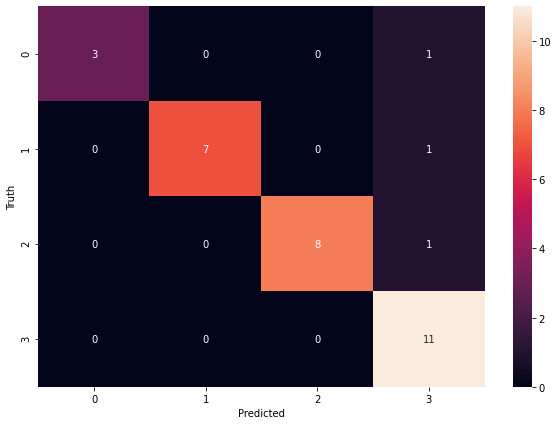

In [38]:
cm = tf.math.confusion_matrix(labels=y_test_labels, predictions=y_predicated_labels_resnet152v2)

plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(69.0, 0.5, 'Truth')

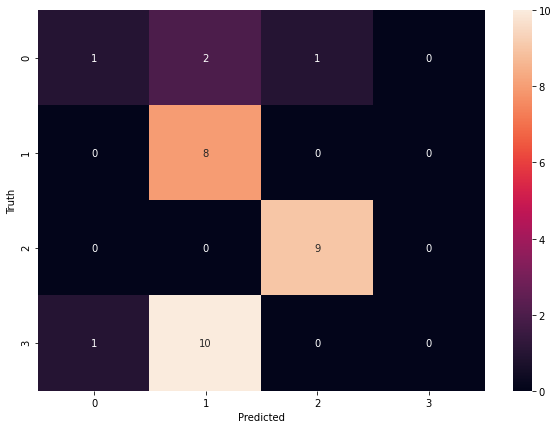

In [39]:
cm = tf.math.confusion_matrix(labels=y_test_labels, predictions=y_predicated_labels_resnet50)

plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')